In [1]:
# Why is the proposal important in today's world ? How predicting a good client is worthy for a bank ?

In [2]:
# How is it going to impact the banking sector?

In [3]:
#If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

### Importing all the important libraries

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

# Data Preparation 

## Importing Dataset

In [5]:
credit_card_df = pd.read_csv("Credit_card.csv")
credit_card_label_df = pd.read_csv("Credit_card_label.csv")

## Data Exploration

In [6]:
credit_card_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [7]:
credit_card_label_df.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [8]:
credit_card_df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


In [9]:
credit_card_df.shape

(1548, 18)

In [10]:
credit_card_label_df.shape

(1548, 2)

In [11]:
credit_card_df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [12]:
#columns: categorical : gender,car_owner,property_owner,type_income,education,marital_status,housing_type,type_occupation
#         numerical :  children,annual_income,birthday_count,work_exp,family_members.

In [13]:
# replace irrelevant columns name like  Ind_id , Propert_Owner

In [14]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [15]:
credit_card_df = credit_card_df.rename( columns = {
    'Ind_ID':'Client_ID',
    'Propert_Owner':'Property_Owner',
    'GENDER':'Gender',
    'CHILDREN':'Children',
    'EDUCATION':'Education',
    'EMAIL_ID':'Email_ID', 
    'Birthday_count':'Age',
    'Employed_days':'Work_Exp'})
credit_card_label_df = credit_card_label_df.rename(columns = {
    'Ind_ID': 'Client_ID'})

In [16]:
credit_card_df

,Client_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Work_Exp,Mobile_phone,Work_Phone,Phone,Email_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


<Axes: >

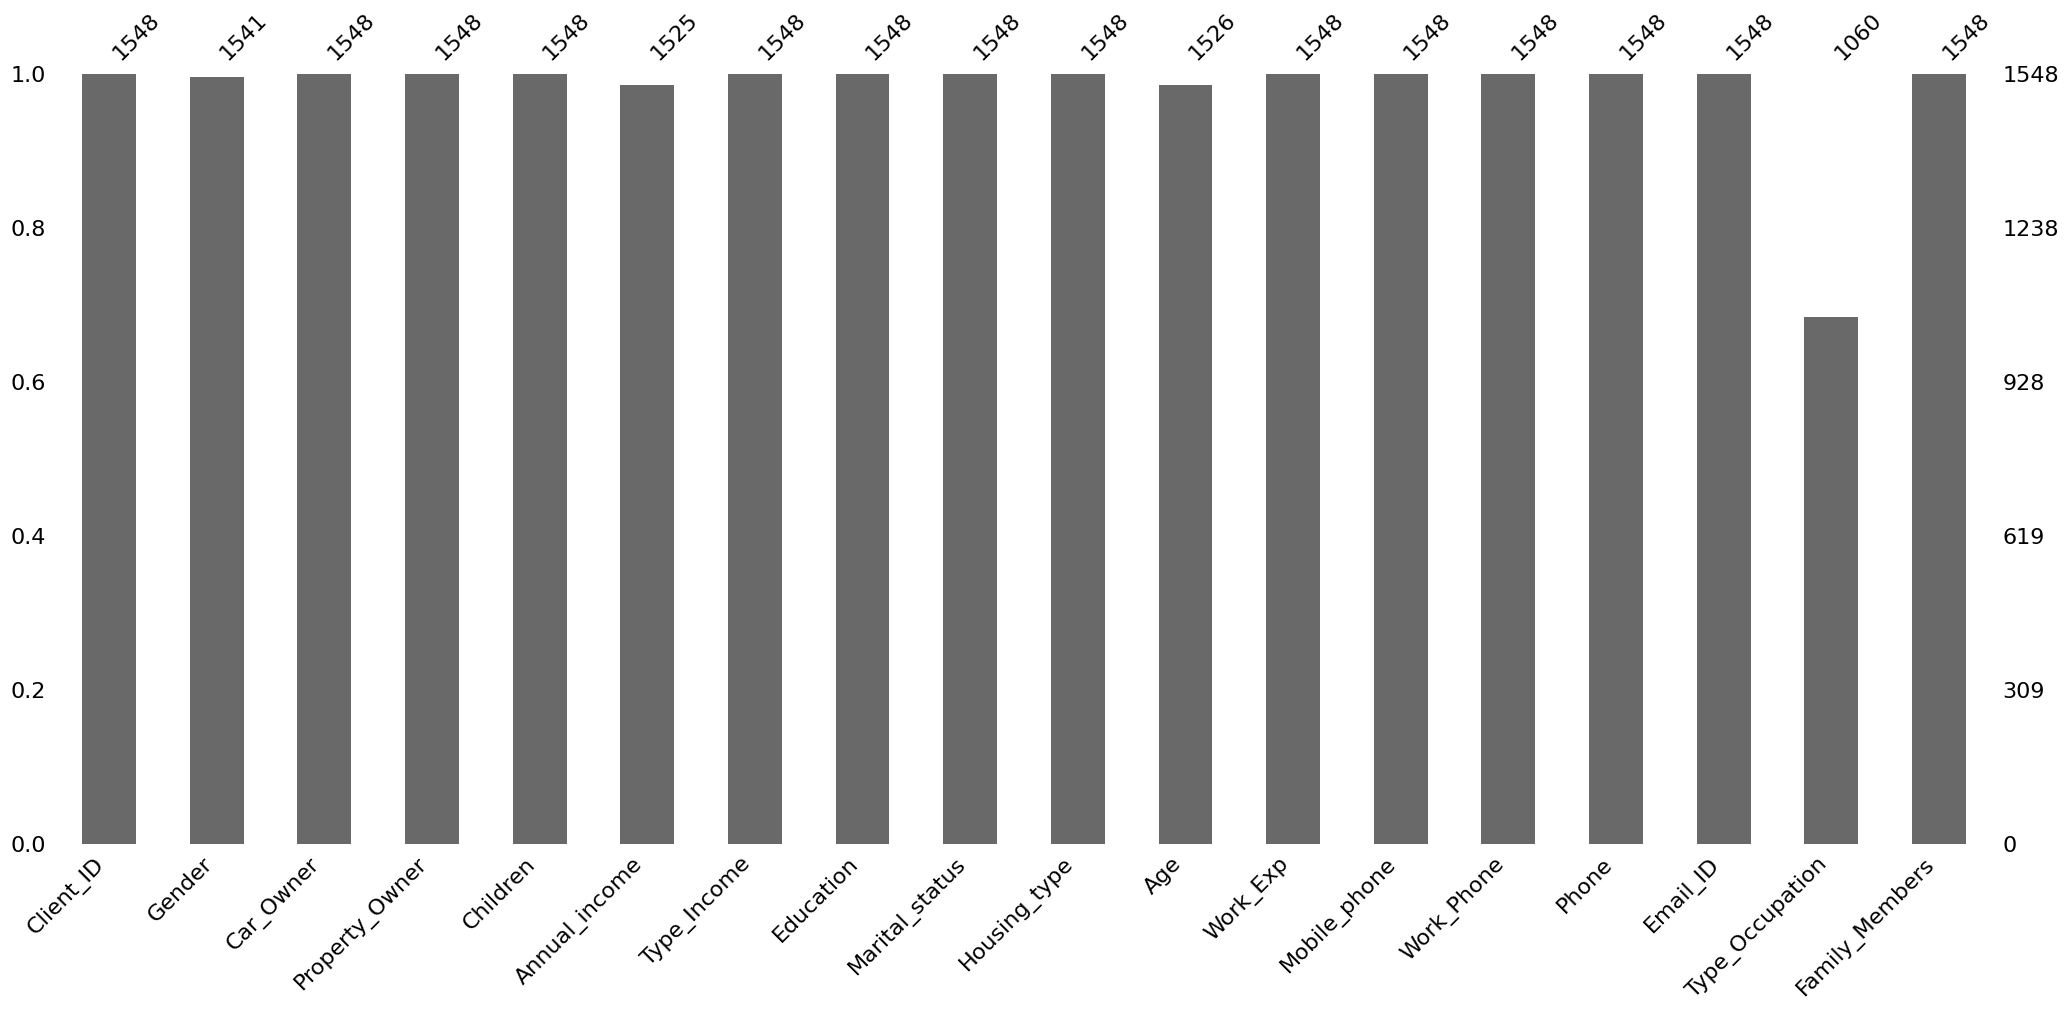

In [17]:
# exploratory the missing values
import missingno as msno
msno.bar(credit_card_df)

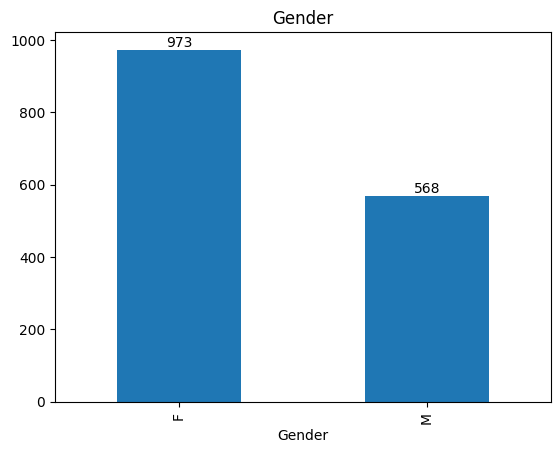

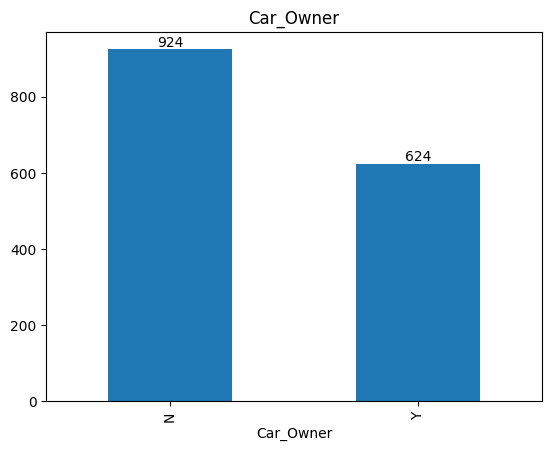

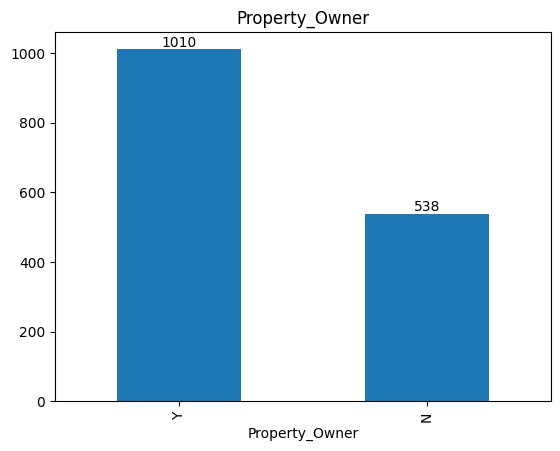

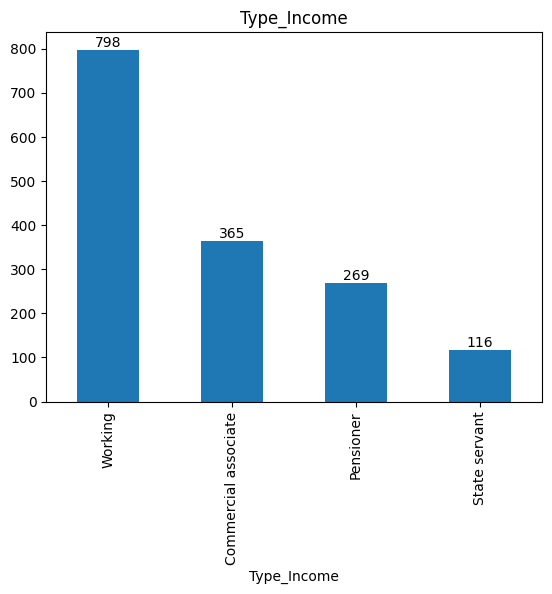

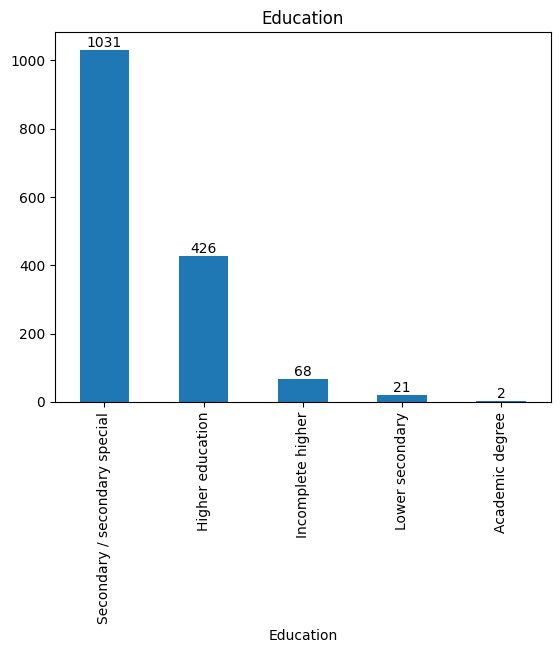

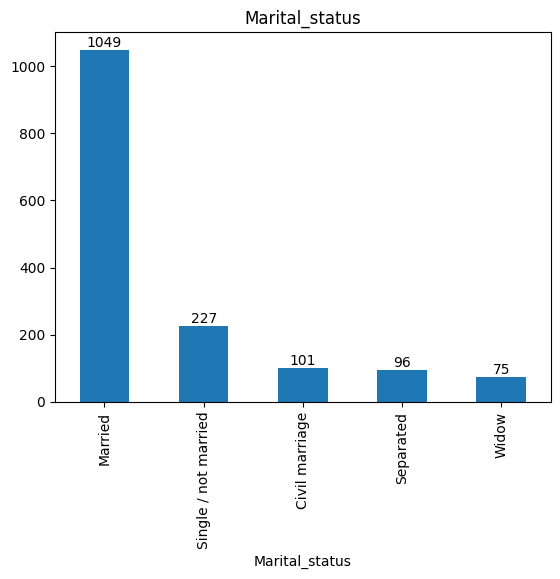

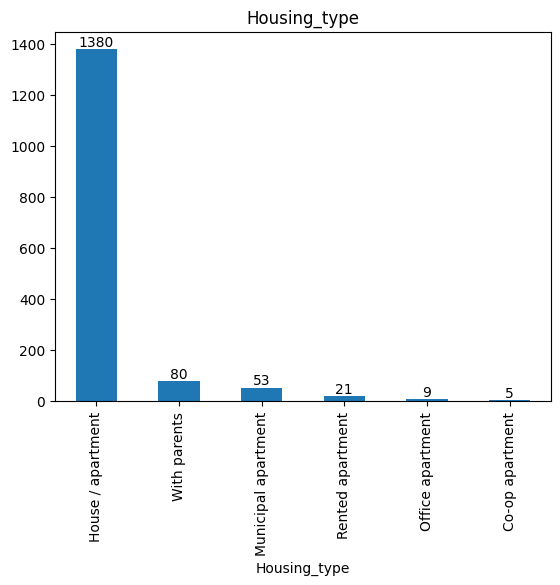

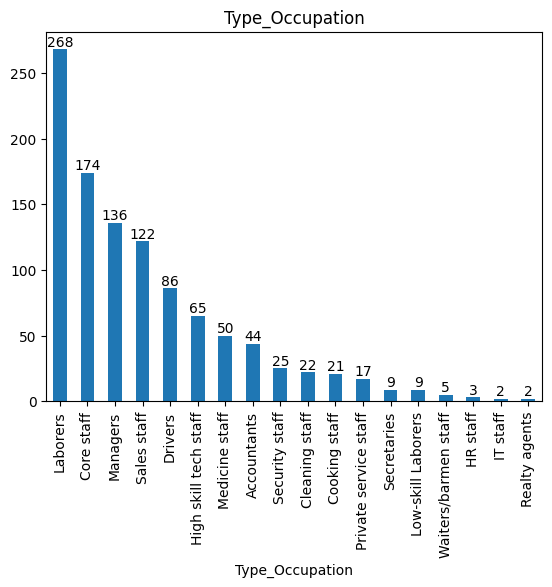

In [18]:
import matplotlib.pyplot as plt

def display_object(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            value_counts = df[column].value_counts()
            ax = value_counts.plot(kind='bar', title=column)
            for i, v in enumerate(value_counts):
                ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
            plt.show()

display_object(credit_card_df)

In [19]:
#Checking null values in columns

In [20]:
credit_card_df.isnull().sum()

Client_ID            0
Gender               7
Car_Owner            0
Property_Owner       0
Children             0
Annual_income       23
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                 22
Work_Exp             0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

## Data Cleaning

In [21]:
# Cleaning Data Columns Wise : 

In [22]:
'''1.Client_ID should not be null,which is not null and is ok
2.Gender has some missing values,it isn't right thing to impute gender instead filling prefer_not_to_say for null values
3.Type_occupation : 
4.Annual Income has some missing values which can be filled when outliers are removed 
5.Work_exp should be converted in years .'''

"1.Client_ID should not be null,which is not null and is ok\n2.Gender has some missing values,it isn't right thing to impute gender instead filling prefer_not_to_say for null values\n3.Type_occupation : \n4.Annual Income has some missing values which can be filled when outliers are removed \n5.Work_exp should be converted in years ."

In [23]:
credit_card_df['Gender'].fillna('prefer_not_to_say',inplace=True)

In [24]:
credit_card_df['Gender'].value_counts()

Gender
F                    973
M                    568
prefer_not_to_say      7
Name: count, dtype: int64

<Axes: >

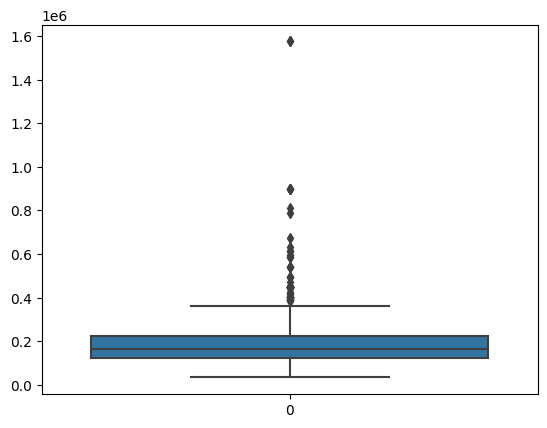

In [25]:
sns.boxplot(credit_card_df['Annual_income'])

In [26]:
# Removing the annual income outlier

<Axes: xlabel='Annual_income', ylabel='Count'>

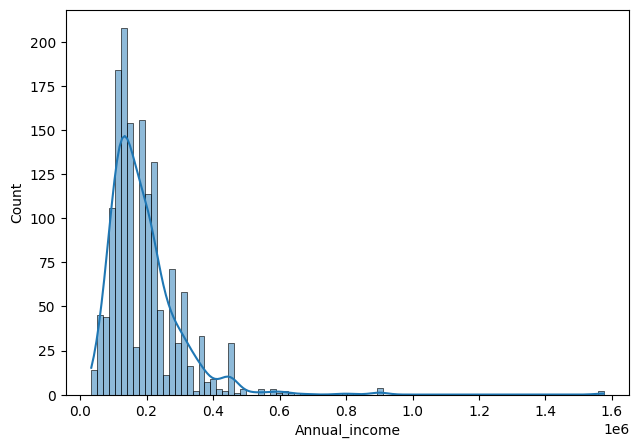

In [27]:
plt.figure(figsize =(16,5))
plt.subplot(1,2,1)
sns.histplot(credit_card_df['Annual_income'],kde=True)

 Skewed Distribution :  A skewness value of 3 is relatively high and indicates that the distribution is positively skewed.
 So we will use , IQR method .


In [28]:
credit_card_df['Type_Occupation'].isnull().sum()

488

In [29]:
# Treating the Work_Exp column : First find the work_exp = 0 , make these rows as not_working

In [30]:
credit_card_df[credit_card_df['Work_Exp'] == 0]['Work_Exp'].value_counts()

Series([], Name: count, dtype: int64)

In [31]:
credit_card_df[credit_card_df['Work_Exp'] == 0]['Type_Occupation']

Series([], Name: Type_Occupation, dtype: object)

In [32]:
credit_card_df.loc[credit_card_df['Work_Exp'] == 0, 'Type_Occupation'] = 'not_working'

In [33]:
credit_card_df['Type_Occupation'].isnull().sum()

488

In [34]:
credit_card_df['Type_Occupation'] = credit_card_df['Type_Occupation'].fillna('not_known')


In [35]:
credit_card_df['Type_Occupation'].isnull().sum()

0

In [36]:
credit_card_df['Type_Occupation'].value_counts()

Type_Occupation
not_known                488
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Low-skill Laborers         9
Secretaries                9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: count, dtype: int64

#### Cleaning the Annual_income column

In [37]:
credit_card_df['Annual_income'].skew()

3.9245642452364167

In [38]:
percentile25 = credit_card_df['Annual_income'].quantile(0.25)
percentile75 = credit_card_df['Annual_income'].quantile(0.75)
IQR = percentile75 - percentile25
upper_limit = percentile75 +1.5*IQR
lower_limit = percentile25 -1.5*IQR


In [39]:
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)
print ("IQR: ",IQR)
print("upper_limit: ",upper_limit)
print("lower_limit: ",lower_limit)

75th quartile:  225000.0
25th quartile:  121500.0
IQR:  103500.0
upper_limit:  380250.0
lower_limit:  -33750.0


In [40]:
#Instead of trimming the ouliers I will cap the ouliers


In [41]:
credit_card_df['Annual_income'] = np.where(
    credit_card_df['Annual_income'] > upper_limit,
    upper_limit,
    np.where(credit_card_df['Annual_income'] < lower_limit,
             lower_limit,credit_card_df['Annual_income']))

In [42]:
credit_card_df['Annual_income'].skew()

0.7825017240191623

In [43]:
# Now Skewness has decreased drastically , I will impute the null values of Annual_income now .

In [44]:
credit_card_df['Annual_income'] =  credit_card_df['Annual_income'].fillna(credit_card_df['Annual_income'].median())

In [45]:
credit_card_df.isnull().sum()

Client_ID           0
Gender              0
Car_Owner           0
Property_Owner      0
Children            0
Annual_income       0
Type_Income         0
Education           0
Marital_status      0
Housing_type        0
Age                22
Work_Exp            0
Mobile_phone        0
Work_Phone          0
Phone               0
Email_ID            0
Type_Occupation     0
Family_Members      0
dtype: int64

In [46]:
# Great ! AnnualIncome has now no null values.Now it's time to fix the age column. 
# First convert it into years ,remove the outliers and then impute the null values .

In [47]:
credit_card_df['Age'] = pd.to_numeric((credit_card_df['Age'] * -1.0 // 365), downcast='integer', errors='coerce')

credit_card_df['Age']

0       51.0
1       37.0
2        NaN
3       37.0
4       37.0
        ... 
1543    32.0
1544    28.0
1545    36.0
1546    41.0
1547    45.0
Name: Age, Length: 1548, dtype: float64

In [48]:
credit_card_df['Age'].isnull().sum()
# Age has been converted into years , now removing the outliers

22

In [49]:
credit_card_df['Age'].skew()

0.17232841791443904

<Axes: >

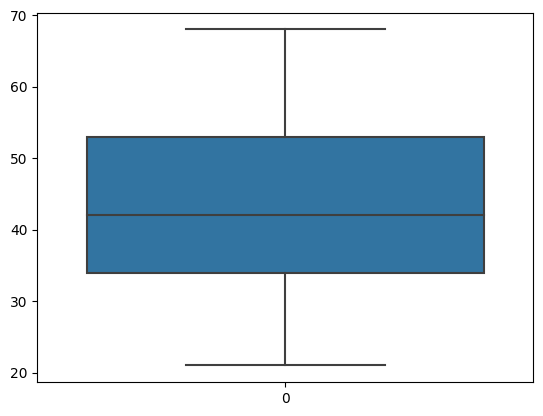

In [50]:
sns.boxplot(credit_card_df['Age'])

In [51]:
# Skewness is close to zero , and boxplot doesn't show outliers , therefore we treat this column as outlier free
# Now impute the missing values

In [52]:
credit_card_df['Age'] = credit_card_df['Age'].fillna(credit_card_df['Age'].median())
credit_card_df['Age'].isnull().sum()

0

In [53]:
credit_card_df.isnull().sum()

Client_ID          0
Gender             0
Car_Owner          0
Property_Owner     0
Children           0
Annual_income      0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Age                0
Work_Exp           0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_ID           0
Type_Occupation    0
Family_Members     0
dtype: int64

In [54]:
# Great ! Annual_income has been successfully imputed . 

In [55]:
credit_card_df['Type_Occupation'].value_counts()

Type_Occupation
not_known                488
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Low-skill Laborers         9
Secretaries                9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: count, dtype: int64

In [56]:
credit_card_df

,Client_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Work_Exp,Mobile_phone,Work_Phone,Phone,Email_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,365243,1,0,0,0,not_known,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,not_known,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,42.0,-586,1,1,1,0,not_known,2
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,not_known,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,not_known,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,32.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,41.0,-645,1,1,1,0,Drivers,2


In [57]:
credit_card_df.isnull().sum()

Client_ID          0
Gender             0
Car_Owner          0
Property_Owner     0
Children           0
Annual_income      0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Age                0
Work_Exp           0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_ID           0
Type_Occupation    0
Family_Members     0
dtype: int64

In [58]:
credit_card_df['Work_Exp'] = np.where(credit_card_df['Work_Exp'] >0,0,credit_card_df['Work_Exp'])
credit_card_df['Work_Exp'] = pd.to_numeric((credit_card_df['Work_Exp'] * -1.0 // 365), downcast='integer', errors='coerce')


<Axes: >

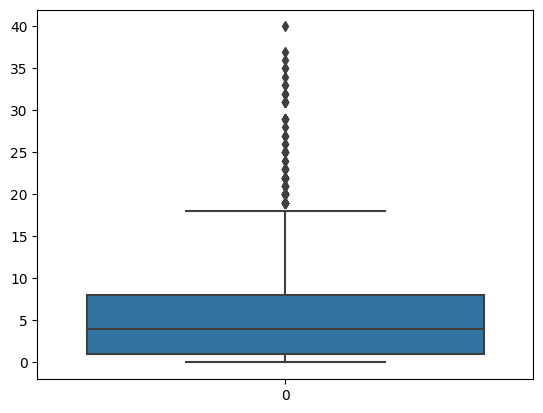

In [59]:
sns.boxplot(credit_card_df['Work_Exp'])

In [60]:
# Treating the outliers by capping . 

In [61]:
credit_card_df['Work_Exp'].skew()

1.7728636579859585

<Axes: xlabel='Work_Exp', ylabel='Count'>

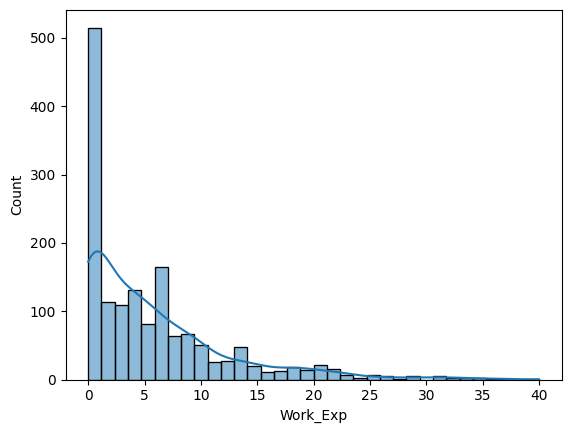

In [62]:
sns.histplot(credit_card_df['Work_Exp'],kde = True)

In [63]:
percentile25 = credit_card_df['Work_Exp'].quantile(0.25)
percentile75 = credit_card_df['Work_Exp'].quantile(0.75)
IQR = percentile75 - percentile25
upper_limit = percentile75 +1.5*IQR
lower_limit = percentile25 -1.5*IQR


In [64]:
credit_card_df['Work_Exp'] = np.where(
    credit_card_df['Work_Exp'] > upper_limit,
    upper_limit,
    np.where(credit_card_df['Work_Exp'] < lower_limit,
             lower_limit,credit_card_df['Work_Exp']))

In [65]:
credit_card_df['Work_Exp'].skew()

1.0644878884827729

<Axes: >

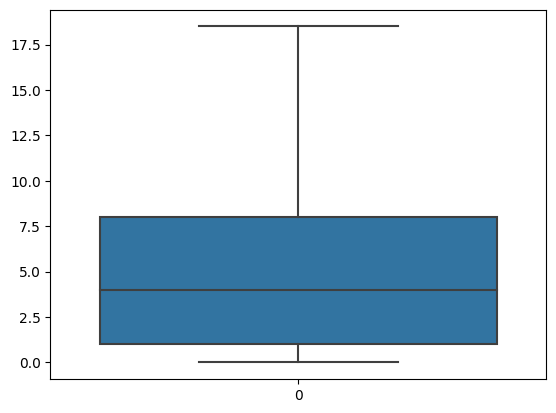

In [66]:
sns.boxplot(credit_card_df['Work_Exp'])

In [67]:
credit_card_df

,Client_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Work_Exp,Mobile_phone,Work_Phone,Phone,Email_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,not_known,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.0,1,1,1,0,not_known,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,42.0,1.0,1,1,1,0,not_known,2
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.0,1,1,1,0,not_known,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.0,1,1,1,0,not_known,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,32.0,5.0,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,6.0,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,41.0,1.0,1,1,1,0,Drivers,2


In [68]:
credit_card_label_df

,Client_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [69]:
credit_merged = pd.merge(credit_card_df,credit_card_label_df)

In [70]:
credit_merged

,Client_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Work_Exp,Mobile_phone,Work_Phone,Phone,Email_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,not_known,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.0,1,1,1,0,not_known,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,42.0,1.0,1,1,1,0,not_known,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.0,1,1,1,0,not_known,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.0,1,1,1,0,not_known,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,32.0,5.0,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,6.0,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,41.0,1.0,1,1,1,0,Drivers,2,0


In [71]:
credit_card_df.isnull().sum()

Client_ID          0
Gender             0
Car_Owner          0
Property_Owner     0
Children           0
Annual_income      0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Age                0
Work_Exp           0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_ID           0
Type_Occupation    0
Family_Members     0
dtype: int64

In [72]:
credit_card_df['Education'].value_counts()

Education
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: count, dtype: int64

In [73]:
 credit_card_df['Marital_status'].value_counts()


Marital_status
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: count, dtype: int64

In [74]:
credit_card_df['Type_Occupation'].value_counts()


Type_Occupation
not_known                488
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Low-skill Laborers         9
Secretaries                9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: count, dtype: int64

In [75]:
credit_card_df['Housing_type'].value_counts()


Housing_type
House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: count, dtype: int64

In [76]:
credit_card_df['Type_Income'].value_counts()


Type_Income
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: count, dtype: int64

In [77]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Client_ID        1548 non-null   int64  
 1   Gender           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1548 non-null   float64
 11  Work_Exp         1548 non-null   float64
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

# Feature Engineering

### Preprocessing the columns

In [78]:
# Feature Scaling for numerical columns

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
num_columns = ['Annual_income','Children','Age','Work_Exp','Family_Members']

In [81]:
for i in num_columns:
    norm = MinMaxScaler().fit(credit_card_df[[i]])
    credit_card_df[i] = norm.transform(credit_card_df[[i]])

In [82]:
credit_card_df

,Client_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Work_Exp,Mobile_phone,Work_Phone,Phone,Email_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0.000000,0.422078,Pensioner,Higher education,Married,House / apartment,0.638298,0.000000,1,0,0,0,not_known,0.071429
1,5009744,F,Y,N,0.000000,0.811688,Commercial associate,Higher education,Married,House / apartment,0.340426,0.054054,1,1,1,0,not_known,0.071429
2,5009746,F,Y,N,0.000000,0.811688,Commercial associate,Higher education,Married,House / apartment,0.446809,0.054054,1,1,1,0,not_known,0.071429
3,5009749,F,Y,N,0.000000,0.383117,Commercial associate,Higher education,Married,House / apartment,0.340426,0.054054,1,1,1,0,not_known,0.071429
4,5009752,F,Y,N,0.000000,0.811688,Commercial associate,Higher education,Married,House / apartment,0.340426,0.054054,1,1,1,0,not_known,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0.000000,0.383117,Commercial associate,Higher education,Married,House / apartment,0.234043,0.270270,1,0,0,0,Managers,0.071429
1544,5023655,F,N,N,0.000000,0.551948,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.148936,0.162162,1,0,0,0,Accountants,0.000000
1545,5115992,M,Y,Y,0.142857,0.422078,Working,Higher education,Married,House / apartment,0.319149,0.324324,1,0,0,0,Managers,0.214286
1546,5118219,M,Y,N,0.000000,0.681818,Working,Secondary / secondary special,Civil marriage,House / apartment,0.425532,0.054054,1,1,1,0,Drivers,0.071429


####

In [83]:
# Categiorcal columns 
# Nominal columns : Gender,Marital_status,Housing_Type.
# Ordinal columns : Car_Owner,Property_Owner , Type_Income, Education,Type_Occupation.

In [84]:
# I want to have these columns specific order as Y means 1 and N means 0 
credit_card_df[['Car_Owner', 'Property_Owner']] = credit_card_df[['Car_Owner', 'Property_Owner']].apply(lambda x: x.map({'Y': 1, 'N': 0}))


In [85]:
# Married - 0, Single/not married - 1, Civil marriage -2 , Seperated - 3, Widow - 4

In [86]:

label_encoder = LabelEncoder()
columns_to_encode = ['Gender', 'Marital_status','Housing_type']

credit_card_df[columns_to_encode] = credit_card_df[columns_to_encode].apply(label_encoder.fit_transform)


In [87]:
# Female has got 0 Male 1 and prefer not to say as 2
credit_card_df['Gender'].value_counts()


Gender
0    973
1    568
2      7
Name: count, dtype: int64

In [88]:
credit_card_df['Marital_status'].value_counts()

Marital_status
1    1049
3     227
0     101
2      96
4      75
Name: count, dtype: int64

In [89]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Client_ID        1548 non-null   int64  
 1   Gender           1548 non-null   int64  
 2   Car_Owner        1548 non-null   int64  
 3   Property_Owner   1548 non-null   int64  
 4   Children         1548 non-null   float64
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   int64  
 9   Housing_type     1548 non-null   int64  
 10  Age              1548 non-null   float64
 11  Work_Exp         1548 non-null   float64
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

In [90]:
categories_order = [['Pensioner','Working','Commercial associate','State servant'],
                    ['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree'],['not_known',
                    'Low-skill Laborers','Laborers','Cleaning staff','Waiters/barmen staff','Private service staff','Core staff','Cooking staff',
                    'Security staff','Sales staff','Drivers','Medicine staff','HR staff','IT staff','Realty agents','Accountants','High skill tech staff',
                    'Managers','Secretaries']]

oe = OrdinalEncoder(categories=categories_order)
credit_card_df[['Type_Income_encoded', 'Education_encoded','Type_Occupation_encoded']] = oe.fit_transform(credit_card_df[['Type_Income', 'Education','Type_Occupation']])
credit_card_df[['Type_Income_encoded', 'Education_encoded','Type_Occupation_encoded']]

,Type_Income_encoded,Education_encoded,Type_Occupation_encoded
0,0.0,3.0,0.0
1,2.0,3.0,0.0
2,2.0,3.0,0.0
3,2.0,3.0,0.0
4,2.0,3.0,0.0
...,...,...,...
1543,2.0,3.0,17.0
1544,2.0,2.0,15.0
1545,1.0,3.0,17.0
1546,1.0,1.0,10.0


In [91]:
credit_card_df.drop(['Type_Income', 'Education', 'Type_Occupation'], axis=1, inplace=True)


In [92]:
credit_card_df

,Client_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Marital_status,Housing_type,Age,Work_Exp,Mobile_phone,Work_Phone,Phone,Email_ID,Family_Members,Type_Income_encoded,Education_encoded,Type_Occupation_encoded
0,5008827,1,1,1,0.000000,0.422078,1,1,0.638298,0.000000,1,0,0,0,0.071429,0.0,3.0,0.0
1,5009744,0,1,0,0.000000,0.811688,1,1,0.340426,0.054054,1,1,1,0,0.071429,2.0,3.0,0.0
2,5009746,0,1,0,0.000000,0.811688,1,1,0.446809,0.054054,1,1,1,0,0.071429,2.0,3.0,0.0
3,5009749,0,1,0,0.000000,0.383117,1,1,0.340426,0.054054,1,1,1,0,0.071429,2.0,3.0,0.0
4,5009752,0,1,0,0.000000,0.811688,1,1,0.340426,0.054054,1,1,1,0,0.071429,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0.000000,0.383117,1,1,0.234043,0.270270,1,0,0,0,0.071429,2.0,3.0,17.0
1544,5023655,0,0,0,0.000000,0.551948,3,1,0.148936,0.162162,1,0,0,0,0.000000,2.0,2.0,15.0
1545,5115992,1,1,1,0.142857,0.422078,1,1,0.319149,0.324324,1,0,0,0,0.214286,1.0,3.0,17.0
1546,5118219,1,1,0,0.000000,0.681818,0,1,0.425532,0.054054,1,1,1,0,0.071429,1.0,1.0,10.0


## Feature Selection 

### Filter Methods: 

#### Remove constant features 
#### Using variance threshold from sklearn to find constant features which have no effect on model building 

In [93]:
from sklearn.feature_selection import VarianceThreshold 
sel = VarianceThreshold(threshold = 0 )
sel.fit(credit_card_df)
sum(sel.get_support())
[x for x in credit_card_df.columns if x not in credit_card_df.columns[sel.get_support()]]

['Mobile_phone']

In [94]:
# drop 'Mobile_phone' column 

In [95]:
credit_card_df.drop(columns=['Mobile_phone'], inplace=True)

##### Checking for quasi-constant 

In [96]:
sel_quasi = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately
sel_quasi.fit(credit_card_df)
[x for x in credit_card_df.columns if x not in credit_card_df.columns[sel_quasi.get_support()]]

['Children', 'Family_Members']

In [97]:
credit_card_df['Children'].value_counts() / float(len(credit_card_df))

Children
0.000000    0.704780
0.071429    0.197028
0.142857    0.086563
0.214286    0.010336
0.285714    0.000646
1.000000    0.000646
Name: count, dtype: float64

In [98]:
credit_card_df['Family_Members'].value_counts()/float(len(credit_card_df))

Family_Members
0.071429    0.518088
0.000000    0.215762
0.142857    0.173127
0.214286    0.082041
0.285714    0.009690
0.357143    0.000646
1.000000    0.000646
Name: count, dtype: float64

In [99]:
credit_card_df['Email_ID'].value_counts()/float(len(credit_card_df))

Email_ID
0    0.907623
1    0.092377
Name: count, dtype: float64

In [100]:
# 90% of data has no email ID therefore email can be dropped for model building .

In [101]:
credit_card_df.drop(columns=['Email_ID'], inplace=True)

In [102]:
# These two columns can't be dropped as these columns have significant diffrence in their respective percentages .

In [103]:
# Checking the relationship between Annual_income and Work_exp , Age

In [104]:
pcc1  = np.corrcoef(credit_card_df['Annual_income'],credit_card_df['Work_Exp'])
print(pcc1)
pcc2  = np.corrcoef(credit_card_df['Annual_income'],credit_card_df['Age'])
print(pcc2)

[[1.         0.08392862]
 [0.08392862 1.        ]]
[[ 1.         -0.10739707]
 [-0.10739707  1.        ]]


In [105]:
# no strong relationship between these variables . 

In [106]:
credit_card_df

,Client_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Marital_status,Housing_type,Age,Work_Exp,Work_Phone,Phone,Family_Members,Type_Income_encoded,Education_encoded,Type_Occupation_encoded
0,5008827,1,1,1,0.000000,0.422078,1,1,0.638298,0.000000,0,0,0.071429,0.0,3.0,0.0
1,5009744,0,1,0,0.000000,0.811688,1,1,0.340426,0.054054,1,1,0.071429,2.0,3.0,0.0
2,5009746,0,1,0,0.000000,0.811688,1,1,0.446809,0.054054,1,1,0.071429,2.0,3.0,0.0
3,5009749,0,1,0,0.000000,0.383117,1,1,0.340426,0.054054,1,1,0.071429,2.0,3.0,0.0
4,5009752,0,1,0,0.000000,0.811688,1,1,0.340426,0.054054,1,1,0.071429,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0.000000,0.383117,1,1,0.234043,0.270270,0,0,0.071429,2.0,3.0,17.0
1544,5023655,0,0,0,0.000000,0.551948,3,1,0.148936,0.162162,0,0,0.000000,2.0,2.0,15.0
1545,5115992,1,1,1,0.142857,0.422078,1,1,0.319149,0.324324,0,0,0.214286,1.0,3.0,17.0
1546,5118219,1,1,0,0.000000,0.681818,0,1,0.425532,0.054054,1,1,0.071429,1.0,1.0,10.0


In [107]:
credit_card_df[['Work_Phone','Phone']]

,Work_Phone,Phone
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1543,0,0
1544,0,0
1545,0,0
1546,1,1


In [108]:
# chi_squared test : 
# Null Hyppthesis : There is no significant relationsjip between two features 
# Alternate Hyppthesis : There is significant relationship between two features.

In [109]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(credit_card_df['Work_Phone'], credit_card_df['Phone'])
# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
# Interpret the results
if p < 0.05:
    print("There is a significant relationship between Work_Phone and Phone.")
else:
    print("There is no significant relationship between Work_Phone and Phone.")


Chi-square statistic: 190.40864054667088
P-value: 2.589012403796421e-43
There is a significant relationship between Work_Phone and Phone.


In [110]:
# Dropping Work_Phone column 

In [111]:
credit_card_df.drop(columns = 'Work_Phone',inplace = True)

In [112]:
credit_card_df

,Client_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Marital_status,Housing_type,Age,Work_Exp,Phone,Family_Members,Type_Income_encoded,Education_encoded,Type_Occupation_encoded
0,5008827,1,1,1,0.000000,0.422078,1,1,0.638298,0.000000,0,0.071429,0.0,3.0,0.0
1,5009744,0,1,0,0.000000,0.811688,1,1,0.340426,0.054054,1,0.071429,2.0,3.0,0.0
2,5009746,0,1,0,0.000000,0.811688,1,1,0.446809,0.054054,1,0.071429,2.0,3.0,0.0
3,5009749,0,1,0,0.000000,0.383117,1,1,0.340426,0.054054,1,0.071429,2.0,3.0,0.0
4,5009752,0,1,0,0.000000,0.811688,1,1,0.340426,0.054054,1,0.071429,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0.000000,0.383117,1,1,0.234043,0.270270,0,0.071429,2.0,3.0,17.0
1544,5023655,0,0,0,0.000000,0.551948,3,1,0.148936,0.162162,0,0.000000,2.0,2.0,15.0
1545,5115992,1,1,1,0.142857,0.422078,1,1,0.319149,0.324324,0,0.214286,1.0,3.0,17.0
1546,5118219,1,1,0,0.000000,0.681818,0,1,0.425532,0.054054,1,0.071429,1.0,1.0,10.0


#### Wrapper Methods

In [113]:
credit_card_merged = pd.merge(credit_card_label_df,credit_card_df)
credit_card_merged.head()

,Client_ID,label,Gender,Car_Owner,Property_Owner,Children,Annual_income,Marital_status,Housing_type,Age,Work_Exp,Phone,Family_Members,Type_Income_encoded,Education_encoded,Type_Occupation_encoded
0,5008827,1,1,1,1,0.0,0.422078,1,1,0.638298,0.000000,0,0.071429,0.0,3.0,0.0
1,5009744,1,0,1,0,0.0,0.811688,1,1,0.340426,0.054054,1,0.071429,2.0,3.0,0.0
2,5009746,1,0,1,0,0.0,0.811688,1,1,0.446809,0.054054,1,0.071429,2.0,3.0,0.0
3,5009749,1,0,1,0,0.0,0.383117,1,1,0.340426,0.054054,1,0.071429,2.0,3.0,0.0
4,5009752,1,0,1,0,0.0,0.811688,1,1,0.340426,0.054054,1,0.071429,2.0,3.0,0.0


In [114]:
# Forward Selection 

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = credit_card_merged.drop('label', axis=1)
y = credit_card_merged['label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty set of selected features
selected_features = []

# Choose a model (e.g., RandomForestClassifier)
model = RandomForestClassifier(random_state=42)

# Define the scoring metric (e.g., accuracy)
best_score = 0

# Forward selection
while len(selected_features) < len(X_train.columns):  # Stop when all features are selected
    best_feature = None
    for feature in X_train.columns:
        if feature not in selected_features:
            # Add the feature temporarily
            current_features = selected_features + [feature]

            # Train the model
            model.fit(X_train[current_features], y_train)

            # Make predictions on the test set
            y_pred = model.predict(X_test[current_features])

            # Evaluate the model performance
            score = accuracy_score(y_test, y_pred)

            # Check if the current feature improves the model
            if score > best_score:
                best_score = score
                best_feature = feature

    # Add the best feature to the selected set
    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Selected feature: {best_feature}, Accuracy: {best_score}")
    else:
        # No improvement found, stop the loop
        break

# Train the final model using the selected features
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train[selected_features], y_train)


Selected feature: Client_ID, Accuracy: 0.9064516129032258
Selected feature: Age, Accuracy: 0.9258064516129032
Selected feature: Children, Accuracy: 0.9387096774193548
Selected feature: Car_Owner, Accuracy: 0.9451612903225807


RandomForestClassifier(random_state=42)

In [116]:
# ClientID , Age , Children , Car_Owner  are important features which can't be dropped . 

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X contains  features (both continuous and categorical) and y is the target variable.
# Make sure to preprocess categorical variables (e.g., one-hot encoding).

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the set of features
selected_features = list(X.columns)

# Choose a model (e.g., RandomForestClassifier)
model = RandomForestClassifier(random_state=42)

# Define the scoring metric (e.g., accuracy)
best_score = accuracy_score(y_test, model.fit(X_train, y_train).predict(X_test))

# Backward selection
while len(selected_features) > 0:
    worst_feature = None
    for feature in selected_features:
        current_features = selected_features.copy()
        current_features.remove(feature)

        # Train the model
        model.fit(X_train[current_features], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[current_features])

        # Evaluate the model performance
        score = accuracy_score(y_test, y_pred)

        # Check if the current feature removal improves the model
        if score > best_score:
            best_score = score
            worst_feature = feature

    # Remove the worst feature from the selected set
    if worst_feature is not None:
        selected_features.remove(worst_feature)
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score}")
    else:
        # No improvement found, stop the loop
        break

# Train the final model using the selected features
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train[selected_features], y_train)


Removed feature: Annual_income, Accuracy: 0.9451612903225807


RandomForestClassifier(random_state=42)

In [118]:
credit_card_merged

,Client_ID,label,Gender,Car_Owner,Property_Owner,Children,Annual_income,Marital_status,Housing_type,Age,Work_Exp,Phone,Family_Members,Type_Income_encoded,Education_encoded,Type_Occupation_encoded
0,5008827,1,1,1,1,0.000000,0.422078,1,1,0.638298,0.000000,0,0.071429,0.0,3.0,0.0
1,5009744,1,0,1,0,0.000000,0.811688,1,1,0.340426,0.054054,1,0.071429,2.0,3.0,0.0
2,5009746,1,0,1,0,0.000000,0.811688,1,1,0.446809,0.054054,1,0.071429,2.0,3.0,0.0
3,5009749,1,0,1,0,0.000000,0.383117,1,1,0.340426,0.054054,1,0.071429,2.0,3.0,0.0
4,5009752,1,0,1,0,0.000000,0.811688,1,1,0.340426,0.054054,1,0.071429,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,0,1,0.000000,0.383117,1,1,0.234043,0.270270,0,0.071429,2.0,3.0,17.0
1544,5023655,0,0,0,0,0.000000,0.551948,3,1,0.148936,0.162162,0,0.000000,2.0,2.0,15.0
1545,5115992,0,1,1,1,0.142857,0.422078,1,1,0.319149,0.324324,0,0.214286,1.0,3.0,17.0
1546,5118219,0,1,1,0,0.000000,0.681818,0,1,0.425532,0.054054,1,0.071429,1.0,1.0,10.0


In [119]:
# Imbalanced Data 
credit_card_merged['label'].value_counts()/float(len(credit_card_merged))

label
0    0.886951
1    0.113049
Name: count, dtype: float64

## Building ML model 

In [120]:
from sklearn.model_selection import train_test_split
# spliting the data 
X = credit_card_merged.iloc[:, 2:]
y = credit_card_merged.iloc[:,1]


#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [121]:
X

,Gender,Car_Owner,Property_Owner,Children,Annual_income,Marital_status,Housing_type,Age,Work_Exp,Phone,Family_Members,Type_Income_encoded,Education_encoded,Type_Occupation_encoded
0,1,1,1,0.000000,0.422078,1,1,0.638298,0.000000,0,0.071429,0.0,3.0,0.0
1,0,1,0,0.000000,0.811688,1,1,0.340426,0.054054,1,0.071429,2.0,3.0,0.0
2,0,1,0,0.000000,0.811688,1,1,0.446809,0.054054,1,0.071429,2.0,3.0,0.0
3,0,1,0,0.000000,0.383117,1,1,0.340426,0.054054,1,0.071429,2.0,3.0,0.0
4,0,1,0,0.000000,0.811688,1,1,0.340426,0.054054,1,0.071429,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,0,1,0.000000,0.383117,1,1,0.234043,0.270270,0,0.071429,2.0,3.0,17.0
1544,0,0,0,0.000000,0.551948,3,1,0.148936,0.162162,0,0.000000,2.0,2.0,15.0
1545,1,1,1,0.142857,0.422078,1,1,0.319149,0.324324,0,0.214286,1.0,3.0,17.0
1546,1,1,0,0.000000,0.681818,0,1,0.425532,0.054054,1,0.071429,1.0,1.0,10.0


In [122]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: label, Length: 1548, dtype: int64

In [123]:
# Create a balanced dataset by oversampling the minority class

In [124]:
X_resampled, y_resampled = resample(X[y == 1], y[y == 1], replace=True, n_samples=X[y == 0].shape[0], random_state=42)

In [125]:
# Concatenate the resampled data with the majority class

In [126]:
X_balanced = pd.concat([X[y == 0], X_resampled])
y_balanced = pd.concat([y[y == 0], y_resampled])

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [128]:
# Scale the features 

In [129]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic regression 

In [130]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [131]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logreg.predict(X_test)
print("logistic regression training set:",logreg.score(X_train, y_train))
print("logistic regression testing set:",logreg.score(X_test, y_test))
print("Accuracy of logistic regression classifier: ", accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

logistic regression training set: 0.5833333333333334
logistic regression testing set: 0.6018181818181818
Accuracy of logistic regression classifier:  0.6018181818181818
[[166 112]
 [107 165]]


### cross validation 

In [132]:
from sklearn.model_selection import ShuffleSplit
model= LogisticRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.86129032 0.89032258 0.89032258 0.90967742 0.88387097 0.86451613
 0.87419355 0.88709677 0.89032258 0.9       ]
0.8851612903225806


## Decision Tree 

In [133]:
from sklearn.tree import DecisionTreeClassifier
classification = DecisionTreeClassifier()
classification = classification.fit(X_train,y_train)
y_pred = classification.predict(X_test)
print("decision tree training set:",classification.score(X_train, y_train))
print("decision tree testing set:",classification.score(X_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

decision tree training set: 0.9972677595628415
decision tree testing set: 0.94
Accuracy: 0.94
[[245  33]
 [  0 272]]


### cross validation

In [134]:
from sklearn.model_selection import ShuffleSplit
model= DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.84193548 0.8483871  0.83870968 0.88064516 0.8516129  0.81290323
 0.8483871  0.88387097 0.82258065 0.85806452]
0.8487096774193548


## XG boost 

In [135]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
xg=XGBClassifier()
xg=xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
print("xg training set:",xg.score(X_train, y_train))
print("xg testing set:",xg.score(X_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

xg training set: 0.9963570127504554
xg testing set: 0.9709090909090909
Accuracy: 0.9709090909090909
[[262  16]
 [  0 272]]


### cross validation

In [136]:
from sklearn.model_selection import ShuffleSplit
model=XGBClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.90967742 0.89354839 0.91612903 0.89677419 0.93225806 0.89354839
 0.92258065 0.92580645 0.93870968 0.90967742]
0.9138709677419354


## Random Forest 

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("rf training set:",rf.score(X_train, y_train))
print("rf testing set:",rf.score(X_test, y_test))
print("Random Forest classifier has accuracy of: ", rf.score(X_test, y_test))
# Evaluate the confusion_matrix
print(confusion_matrix(y_test, y_pred))

rf training set: 0.9972677595628415
rf testing set: 0.9890909090909091
Random Forest classifier has accuracy of:  0.9890909090909091
[[272   6]
 [  0 272]]


### cross validation 

In [138]:
from sklearn.model_selection import ShuffleSplit
model=RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.93870968 0.91612903 0.90645161 0.91612903 0.93870968 0.92258065
 0.92580645 0.92903226 0.90967742 0.91935484]
0.9222580645161292


In [139]:
#After feature selection we used four machine learning models and achieved quite good accuracy 
#98% in Random Forest for predicting the credit card approval.

## SQL Part

In [140]:
!pip install sqlalchemy


Defaulting to user installation because normal site-packages is not writeable


In [141]:
from sqlalchemy import create_engine

In [142]:
engine = create_engine('sqlite:///:memory:')

In [143]:
credit_merged.to_sql('credit_merged_sql', con=engine, index=False, if_exists='replace')


1548

In [144]:
result = pd.read_sql('select * from credit_merged_sql',con = engine)
result

,Client_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Work_Exp,Mobile_phone,Work_Phone,Phone,Email_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,not_known,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.0,1,1,1,0,not_known,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,42.0,1.0,1,1,1,0,not_known,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.0,1,1,1,0,not_known,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.0,1,1,1,0,not_known,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,32.0,5.0,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,6.0,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,41.0,1.0,1,1,1,0,Drivers,2,0


In [154]:
#
result1 = pd.read_sql('SELECT  Type_Income, AVG(Annual_income) AS Avg_Annual_Income '
                      'FROM credit_merged_sql '
                      'GROUP BY  Type_Income '
                      'ORDER BY Type_Income', con=engine)
result1




,Type_Income,Avg_Annual_Income
0,Commercial associate,214108.767123
1,Pensioner,151981.042751
2,State servant,202655.172414
3,Working,178634.864662


In [146]:
credit_merged['Type_Income'].value_counts()

Type_Income
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: count, dtype: int64

In [147]:
# Female Owners haivng cars and property

result2 = pd.read_sql("SELECT Client_ID, Gender "
                      "FROM credit_merged_sql "
                      "WHERE Gender = 'F' AND Car_Owner = 'Y' AND Property_Owner = 'Y'", con=engine)
result2

                    

,Client_ID,Gender
0,5018498,F
1,5018501,F
2,5018503,F
3,5024213,F
4,5036660,F
...,...,...
172,5048458,F
173,5023719,F
174,5033520,F
175,5024049,F


In [148]:
credit_merged['Housing_type'].value_counts()

Housing_type
House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: count, dtype: int64

In [149]:
# Male customers staying with their families 
result3 = pd.read_sql("SELECT Client_ID "
                      "FROM credit_merged_sql "
                      "WHERE Gender = 'M' AND Housing_type = 'With parents'" , con=engine)
result3

,Client_ID
0,5021303
1,5079166
2,5079167
3,5079168
4,5050729
5,5028383
6,5143019
7,5067982
8,5143573
9,5038751


In [150]:
# Top five people having the highest income 
result4 = pd.read_sql("SELECT Client_ID  "
                      "FROM credit_merged_sql "
                      "ORDER BY Annual_Income DESC "
                      "LIMIT 5", con=engine)
result4

,Client_ID
0,5010864
1,5010868
2,5010869
3,5021303
4,5024213


In [151]:
# How many  married people are having bad credit 
result5 = pd.read_sql("SELECT count(Client_ID) " 
                      "FROM credit_merged_sql "
                      "WHERE Marital_status	= 'Married' AND label = 1" , con = engine)
result5

,count(Client_ID)
0,114


In [152]:
# Highest education level and what is the total count 
result6 = pd.read_sql("SELECT Education , count(Client_ID)"
                      "FROM credit_merged_sql "
                      "WHERE Education = 'Academic degree' " ,con = engine)
result6

,Education,count(Client_ID)
0,Academic degree,2


In [153]:
# Between married males and females , who is having more bad credit ?
result7 = pd.read_sql("SELECT Gender , count(Client_ID)"
                      "FROM credit_merged_sql "
                      "WHERE label = 1 and Marital_status = 'Married' "
                      "GROUP BY Gender " , con =engine)
result7

# Females have more bad credit than Males 

,Gender,count(Client_ID)
0,F,59
1,M,51
2,prefer_not_to_say,4
